# Object based simulation - basic example

In this notebook we will explore how to simulate random shapes (in this case, simple disks) in a 2D space. Very often, training images used in multiple-point statistics are simulated with the same principles, but with more complex shapes...

First of all, we have to import some modules.

In [1]:
import numpy as np
import matplotlib.pylab as pl

## Grid definition

It is then useful to define the size of our grid and the number of round objects (`nb_obj`) that we want to simulate.

In [2]:
# Number of objects
nb_obj = 10

# Grid definition
nx = 300
ny = 200
ox = 0.0
oy = 0.0
dx = 1.0
dy = 1.0
# Coordinates of the grid nodes
x, y = np.meshgrid(np.arange(oy,ny*dy,dy), np.arange(ox,nx*dx,dx))

Then, a canvas where to draw our shapes should be defined, that is a matrix that contains `0` where there is no shape, and `1` when a shape is defined. This matrix could become our training image. (note that we could also use all the `Image` objects defined in the library `geone`. However, here, for the moment we do not need all this.)

In [3]:
ti = np.zeros((nx, ny))

## Random centers of the disks

We can then select from a uniform distribution the centers of the disks, and a size for their radius

In [4]:
np.random.seed(45137)
x_obj = np.random.uniform(x.min(), x.max(), nb_obj)
y_obj = np.random.uniform(y.min(), y.max(), nb_obj)
r = 10

## Simulation

It is then easy to define the region included in a circle centered in the point `(x_obj, y_obj)` within a radius `r`:

In [5]:
for i in range(nb_obj):
    ti[np.where(np.hypot(x-x_obj[i],y-y_obj[i])<r)] = 1

## Plot

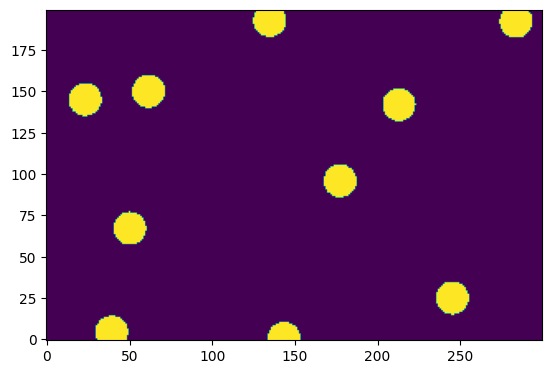

In [6]:
pl.imshow(ti.T, origin="lower")
pl.show()

## Concluding remarks

Starting from this simple example, one can imagine how more complex shapes are simulated (ellipsoids, channels, and so on). Also, here we did not care about any overlapping rules. However, these could also be included with more lines of code. Tools exists to mix also different kind of objects, and so on. See for example the SGeMS pluging [TeTris](https://pangea.stanford.edu/departments/ere/dropbox/scrf/documents/reports/23/SCRF2010_Report23/SCRF2010_06.Boucher_SCRF2010-TI.pdf).

## Conditioning

One could also imagine some algorithms to include the conditioning to some observation points. This can be for example accomplished by including some rejection criteria, where only the realizations that fullfill some requirements are kept. Nevertheless, in complex situations, this can be very cumbersome in terms of computing time. It is easier to perform first a non-conditional object-based simulation, and then use the obtained simulation (one realization is sufficient) as training image in a multiple-point statistics simulation.

### Try yourself

1. Try to set a different random seed, and/or a different number of objects or values for the radius of the disks `r`.
2. You could also select a radius from a statistical distribution, for example a normal distribution.
3. In practical case studies, and in particular if your goal is to create a training image, you will never have the information about the precise number of objects, but instead for example an idea about the proportion of the facies `1`. Modify the script so that the simulation of objects is stopped when a proportions of facies `1` of 20% is reached. 